In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/drive/My Drive/pfizer/data.csv')

In [3]:
data.head()

,gender,age,hospitalization,admission_type,admission_origin,admission_diagnosis,insurance,religion,marital_status,ethnicity,num_callouts,num_diagnoses,num_procedures,admission_procedure,num_cptevents,num_inputevents,num_labevents,num_microbiologyevents,num_noteevents,num_outputevents,num_procedureevents,num_transfers,num_chartevents,expired,patient_id
0,M,66,5.92,EMERGENCY,CLINIC REFERRAL,PNEUMONIA,Medicare,NOT SPECIFIED,DIVORCED,WHITE,1.0,2.0,0.0,Closed bronchial biopsy,1.0,7.0,37.0,3.0,0.0,2.0,0.0,1.0,356.0,0,0
1,M,26,3.79,EMERGENCY,EMERGENCY ROOM ADMISSION,SEIZURE,Government,NOT SPECIFIED,SINGLE,PATIENT DECLINED TO ANSWER,1.0,0.0,1.0,Cont inv mec ven <96 hrs,2.0,51.0,44.0,2.0,1.0,11.0,0.0,1.0,763.0,0,1
2,M,51,18.00,EMERGENCY,ER ADMISSION,SCALP LACERATION;RESPIRATORY FAILURE,Government,UNOBTAINABLE,DIVORCED,BLACK/AFRICAN AMERICAN,0.0,1.0,1.0,Cont inv mec ven 96+ hrs,1.0,63.0,48.0,3.0,0.0,16.0,0.0,0.0,1102.0,0,2
3,F,51,13.79,URGENT,TRANSFER FROM HOSPITAL,CARDIAC DZ.,Private,OTHER,MARRIED,UNKNOWN/NOT SPECIFIED,0.0,1.0,0.0,Implt/repl carddefib tot,1.0,3.0,22.0,1.0,0.0,1.0,0.0,0.0,38.0,0,3
4,F,72,9.21,ELECTIVE,NaN,ABDOMINAL LAXITY/SDA,Medicare,NOT SPECIFIED,SINGLE,WHITE,1.0,2.0,1.0,Uterine les destruct NEC,1.0,2.0,18.0,0.0,0.0,3.0,0.0,0.0,155.0,0,4


In [4]:
# data['admission_origin'][4].lower()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48976 entries, 0 to 48975
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  48976 non-null  object 
 1   age                     48976 non-null  int64  
 2   hospitalization         48976 non-null  float64
 3   admission_type          48976 non-null  object 
 4   admission_origin        45400 non-null  object 
 5   admission_diagnosis     48955 non-null  object 
 6   insurance               48146 non-null  object 
 7   religion                48598 non-null  object 
 8   marital_status          40327 non-null  object 
 9   ethnicity               48275 non-null  object 
 10  num_callouts            48976 non-null  float64
 11  num_diagnoses           48976 non-null  float64
 12  num_procedures          48976 non-null  float64
 13  admission_procedure     47484 non-null  object 
 14  num_cptevents           48976 non-null

In [6]:
data.isna().sum()

gender                       0
age                          0
hospitalization              0
admission_type               0
admission_origin          3576
admission_diagnosis         21
insurance                  830
religion                   378
marital_status            8649
ethnicity                  701
num_callouts                 0
num_diagnoses                0
num_procedures               0
admission_procedure       1492
num_cptevents                0
num_inputevents              0
num_labevents                0
num_microbiologyevents       0
num_noteevents               0
num_outputevents             0
num_procedureevents          0
num_transfers                0
num_chartevents              0
expired                      0
patient_id                   0
dtype: int64

In [7]:
for col in data.columns:
    print(col)
    print(data[col].value_counts(),'\n')

gender
M    27353
F    21623
Name: gender, dtype: int64 

age
0     6796
52    1358
58    1050
50     985
55     960
      ... 
17      59
16      20
15       7
14       1
89       1
Name: age, Length: 77, dtype: int64 

hospitalization
1.96      311
4.00      304
2.00      284
4.04      281
3.96      280
         ... 
63.96       1
76.96       1
108.54      1
105.54      1
41.33       1
Name: hospitalization, Length: 1796, dtype: int64 

admission_type
EMERGENCY    34894
NEWBORN       6586
ELECTIVE      6379
URGENT        1117
Name: admission_type, dtype: int64 

admission_origin
EMERGENCY ROOM ADMISSION              10729
PHYSICAL REFERRAL                      9617
CLINIC REFERRAL                        6805
TRANSFER FROM HOSPITAL                 5607
ADMITTED FROM EMERGENCY                3087
ER ADMISSION                           1822
CLINIC REFERAL                          824
TRANFSER FROM HOSPITAL                  664
REFERRAL                                637
CLINIC          

In [8]:
data.shape

(48976, 25)

In [9]:
data['hospitalization'].describe()


count    48976.000000
mean        10.085454
std         12.445730
min          0.000000
25%          3.710000
50%          6.420000
75%         11.750000
max        294.630000
Name: hospitalization, dtype: float64

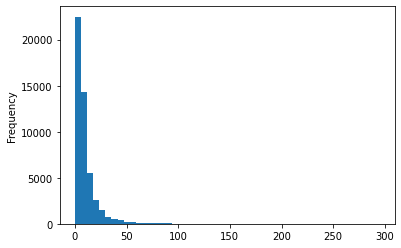

In [10]:
data['hospitalization'].plot.hist(bins = 50)

In [11]:
data['age'].describe()

count    48976.000000
mean        52.880574
std         26.072615
min          0.000000
25%         43.000000
50%         59.000000
75%         73.000000
max         89.000000
Name: age, dtype: float64

hospitalization-admition type

In [12]:
data["admission_type"].value_counts()

EMERGENCY    34894
NEWBORN       6586
ELECTIVE      6379
URGENT        1117
Name: admission_type, dtype: int64

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text major ticklabel objects>)

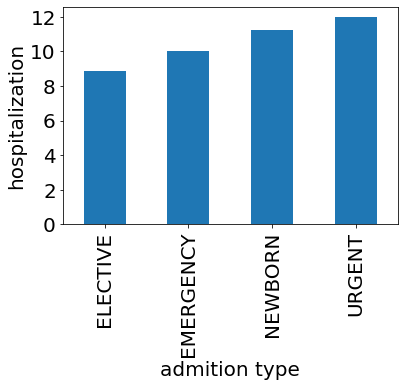

In [13]:
import matplotlib.pyplot as plt
import matplotlib.axes
import matplotlib.cbook as cbook

data.groupby("admission_type")['hospitalization'].mean().plot(kind='bar')
plt.ylabel("hospitalization", fontsize = 20)
plt.xlabel("admition type", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

hospitalization-age

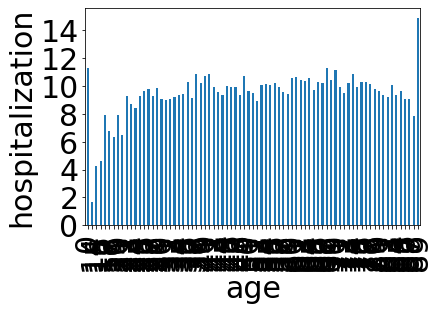

In [14]:
data.groupby("age")['hospitalization'].mean().plot(kind='bar')
plt.ylabel("hospitalization", fontsize = 30)
plt.xlabel("age", fontsize = 30)
plt.xticks(fontsize = 30, rotation = 90)
plt.yticks(fontsize = 30)
plt.rcParams["figure.figsize"] = (40,20)
plt.show()

add duration of hospitalization column

In [15]:
#add a new column (duration of hospitalization) next to hospitalization column. 
category = pd.cut(data.hospitalization,bins=[0,1,7,14,30,300],labels=['Day','Week','TwoWeeks','Month','More'])
data.insert(2,'duration_of_hospitalization',category)

In [16]:
data.head()

,gender,age,duration_of_hospitalization,hospitalization,admission_type,admission_origin,admission_diagnosis,insurance,religion,marital_status,ethnicity,num_callouts,num_diagnoses,num_procedures,admission_procedure,num_cptevents,num_inputevents,num_labevents,num_microbiologyevents,num_noteevents,num_outputevents,num_procedureevents,num_transfers,num_chartevents,expired,patient_id
0,M,66,Week,5.92,EMERGENCY,CLINIC REFERRAL,PNEUMONIA,Medicare,NOT SPECIFIED,DIVORCED,WHITE,1.0,2.0,0.0,Closed bronchial biopsy,1.0,7.0,37.0,3.0,0.0,2.0,0.0,1.0,356.0,0,0
1,M,26,Week,3.79,EMERGENCY,EMERGENCY ROOM ADMISSION,SEIZURE,Government,NOT SPECIFIED,SINGLE,PATIENT DECLINED TO ANSWER,1.0,0.0,1.0,Cont inv mec ven <96 hrs,2.0,51.0,44.0,2.0,1.0,11.0,0.0,1.0,763.0,0,1
2,M,51,Month,18.00,EMERGENCY,ER ADMISSION,SCALP LACERATION;RESPIRATORY FAILURE,Government,UNOBTAINABLE,DIVORCED,BLACK/AFRICAN AMERICAN,0.0,1.0,1.0,Cont inv mec ven 96+ hrs,1.0,63.0,48.0,3.0,0.0,16.0,0.0,0.0,1102.0,0,2
3,F,51,TwoWeeks,13.79,URGENT,TRANSFER FROM HOSPITAL,CARDIAC DZ.,Private,OTHER,MARRIED,UNKNOWN/NOT SPECIFIED,0.0,1.0,0.0,Implt/repl carddefib tot,1.0,3.0,22.0,1.0,0.0,1.0,0.0,0.0,38.0,0,3
4,F,72,TwoWeeks,9.21,ELECTIVE,NaN,ABDOMINAL LAXITY/SDA,Medicare,NOT SPECIFIED,SINGLE,WHITE,1.0,2.0,1.0,Uterine les destruct NEC,1.0,2.0,18.0,0.0,0.0,3.0,0.0,0.0,155.0,0,4


add age group column

In [17]:
data['age'].max()

89

In [18]:
#add a new column (age group) next to age column. 
category = pd.cut(data.age,bins=[-1,2,17,65,100],labels=['Baby','Child','Adult','Elderly'])
data.insert(1,'age_group',category)

In [19]:
data.head(100)

,gender,age_group,age,duration_of_hospitalization,hospitalization,admission_type,admission_origin,admission_diagnosis,insurance,religion,marital_status,ethnicity,num_callouts,num_diagnoses,num_procedures,admission_procedure,num_cptevents,num_inputevents,num_labevents,num_microbiologyevents,num_noteevents,num_outputevents,num_procedureevents,num_transfers,num_chartevents,expired,patient_id
0,M,Elderly,66,Week,5.92,EMERGENCY,CLINIC REFERRAL,PNEUMONIA,Medicare,NOT SPECIFIED,DIVORCED,WHITE,1.0,2.0,0.0,Closed bronchial biopsy,1.0,7.0,37.0,3.0,0.0,2.0,0.0,1.0,356.0,0,0
1,M,Adult,26,Week,3.79,EMERGENCY,EMERGENCY ROOM ADMISSION,SEIZURE,Government,NOT SPECIFIED,SINGLE,PATIENT DECLINED TO ANSWER,1.0,0.0,1.0,Cont inv mec ven <96 hrs,2.0,51.0,44.0,2.0,1.0,11.0,0.0,1.0,763.0,0,1
2,M,Adult,51,Month,18.00,EMERGENCY,ER ADMISSION,SCALP LACERATION;RESPIRATORY FAILURE,Government,UNOBTAINABLE,DIVORCED,BLACK/AFRICAN AMERICAN,0.0,1.0,1.0,Cont inv mec ven 96+ hrs,1.0,63.0,48.0,3.0,0.0,16.0,0.0,0.0,1102.0,0,2
3,F,Adult,51,TwoWeeks,13.79,URGENT,TRANSFER FROM HOSPITAL,CARDIAC DZ.,Private,OTHER,MARRIED,UNKNOWN/NOT SPECIFIED,0.0,1.0,0.0,Implt/repl carddefib tot,1.0,3.0,22.0,1.0,0.0,1.0,0.0,0.0,38.0,0,3
4,F,Elderly,72,TwoWeeks,9.21,ELECTIVE,NaN,ABDOMINAL LAXITY/SDA,Medicare,NOT SPECIFIED,SINGLE,WHITE,1.0,2.0,1.0,Uterine les destruct NEC,1.0,2.0,18.0,0.0,0.0,3.0,0.0,0.0,155.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,F,Baby,0,Week,1.96,NEWBORN,PHYSICAL REFERRAL,NEWBORN,Private,NOT SPECIFIED,NaN,CAUCASIAN,0.0,2.0,0.0,NaN,0.0,0.0,15.0,1.0,1.0,0.0,0.0,3.0,28.0,0,95
96,F,Baby,0,Week,3.96,NEWBORN,PHYSICAL REFERRAL,NEWBORN,Private,JEWISH,NaN,GUERO,0.0,1.0,0.0,Vaccination NEC,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,10.0,0,96
97,M,Elderly,73,TwoWeeks,8.58,EMERGENCY,EMERGENCY ROOM ADMISSION,GASTROINTESTINAL BLEED,Medicare,CATHOLIC,NaN,CAUCASIAN,0.0,1.0,0.0,Colonoscopy,1.0,10.0,41.0,1.0,0.0,5.0,0.0,1.0,229.0,0,97
98,M,Elderly,67,Month,14.25,ELECTIVE,PHYSICAL REFERRAL,RIGHT UPPER LOBE NODULE/SDA,Private,OTHER,MARRIED,WHITE,1.0,1.0,1.0,,1.0,4.0,27.0,0.0,0.0,8.0,0.0,0.0,460.0,0,98


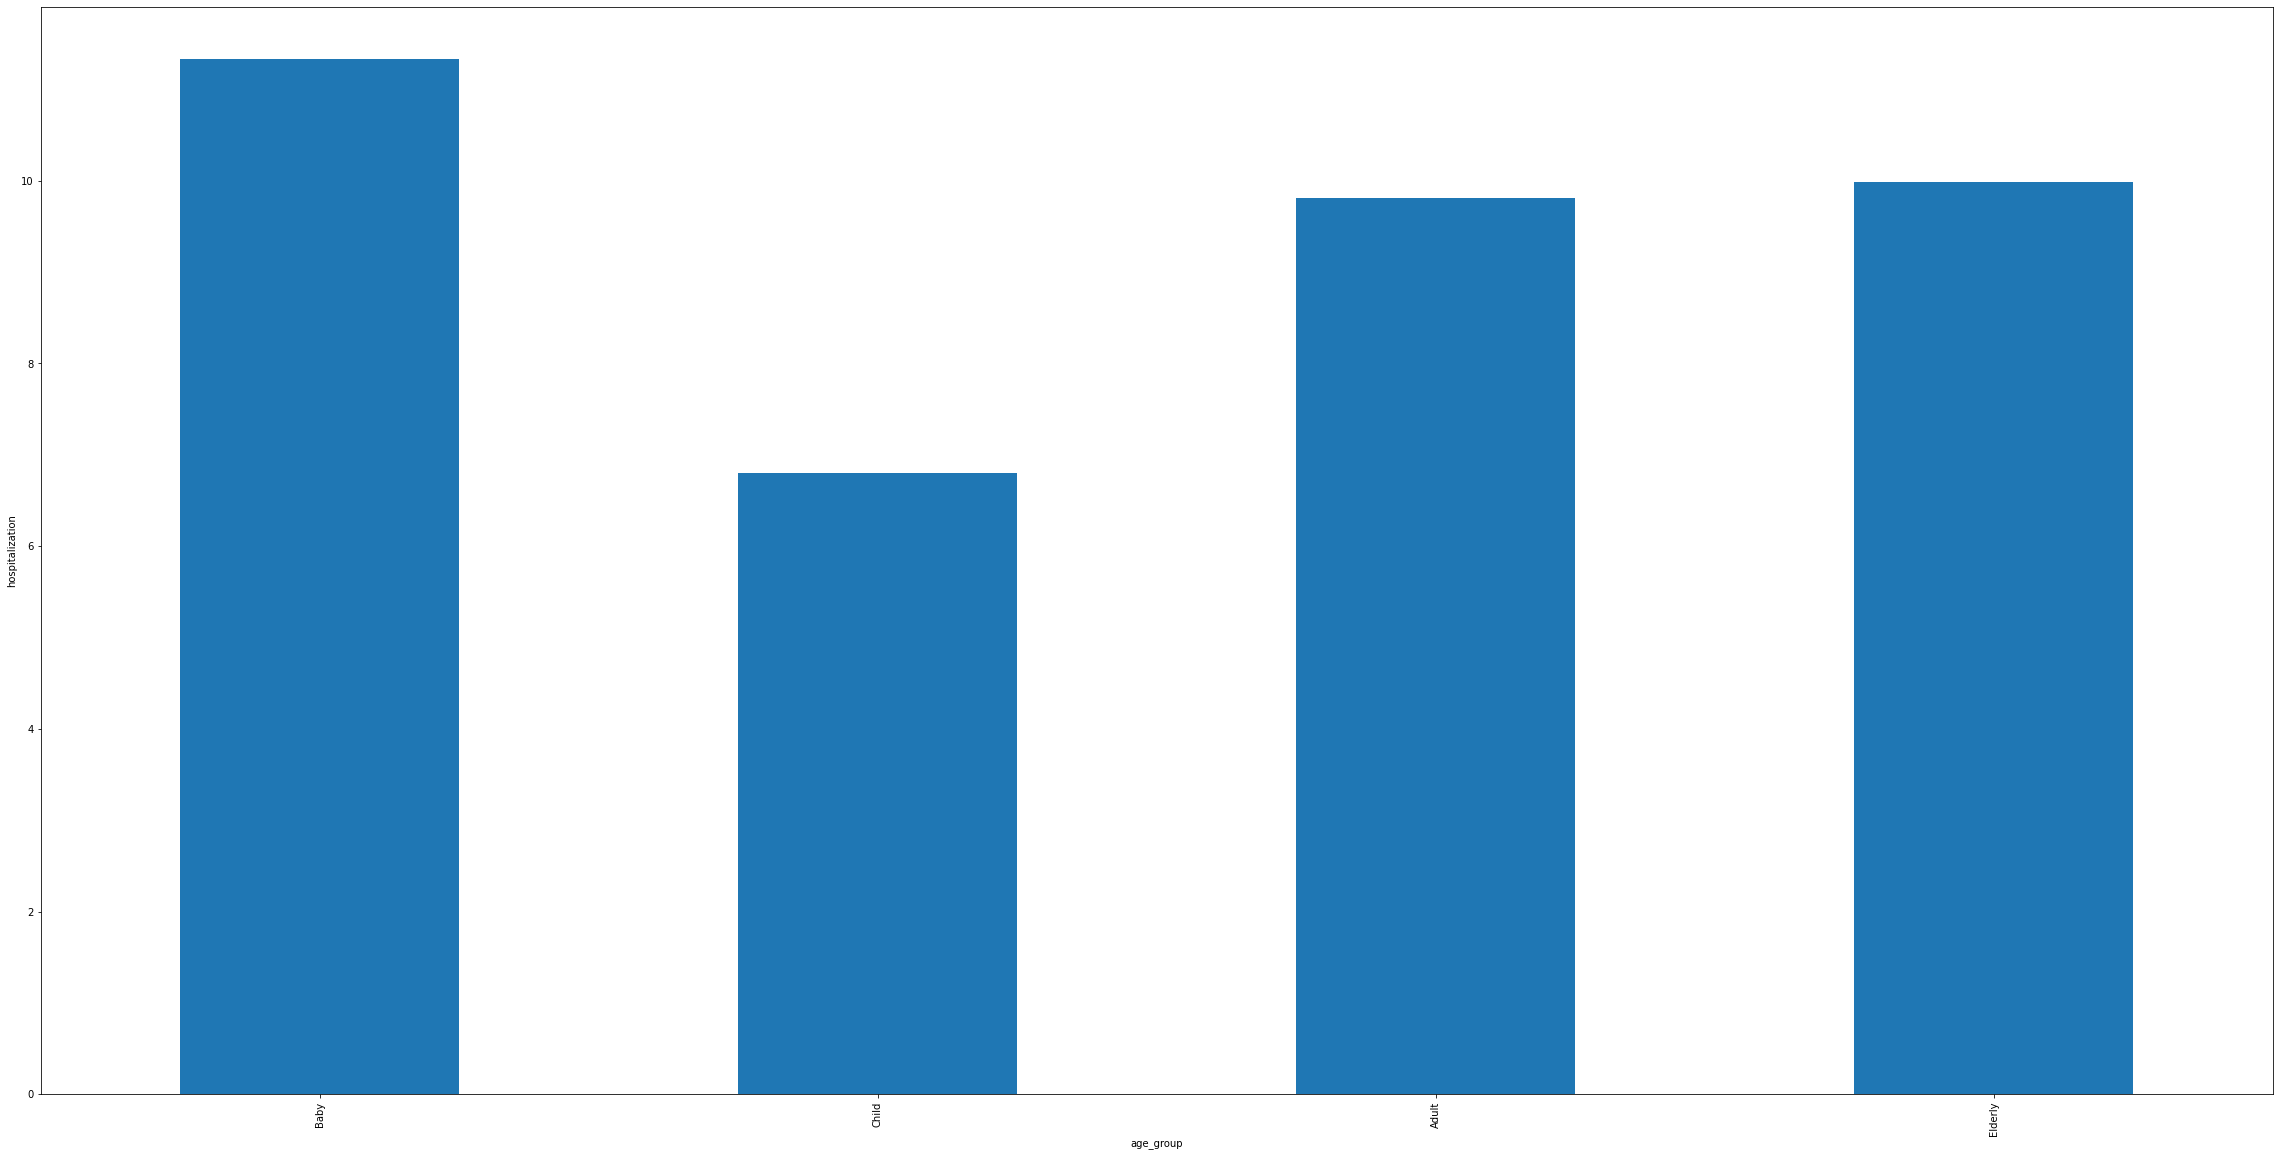

In [20]:
data.groupby("age_group")['hospitalization'].mean().plot(kind='bar')
plt.ylabel("hospitalization", fontsize = 10)
plt.xlabel("age_group", fontsize = 10)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10)
plt.rcParams["figure.figsize"] = (6.4,4.8)
plt.show()

correlation between all features

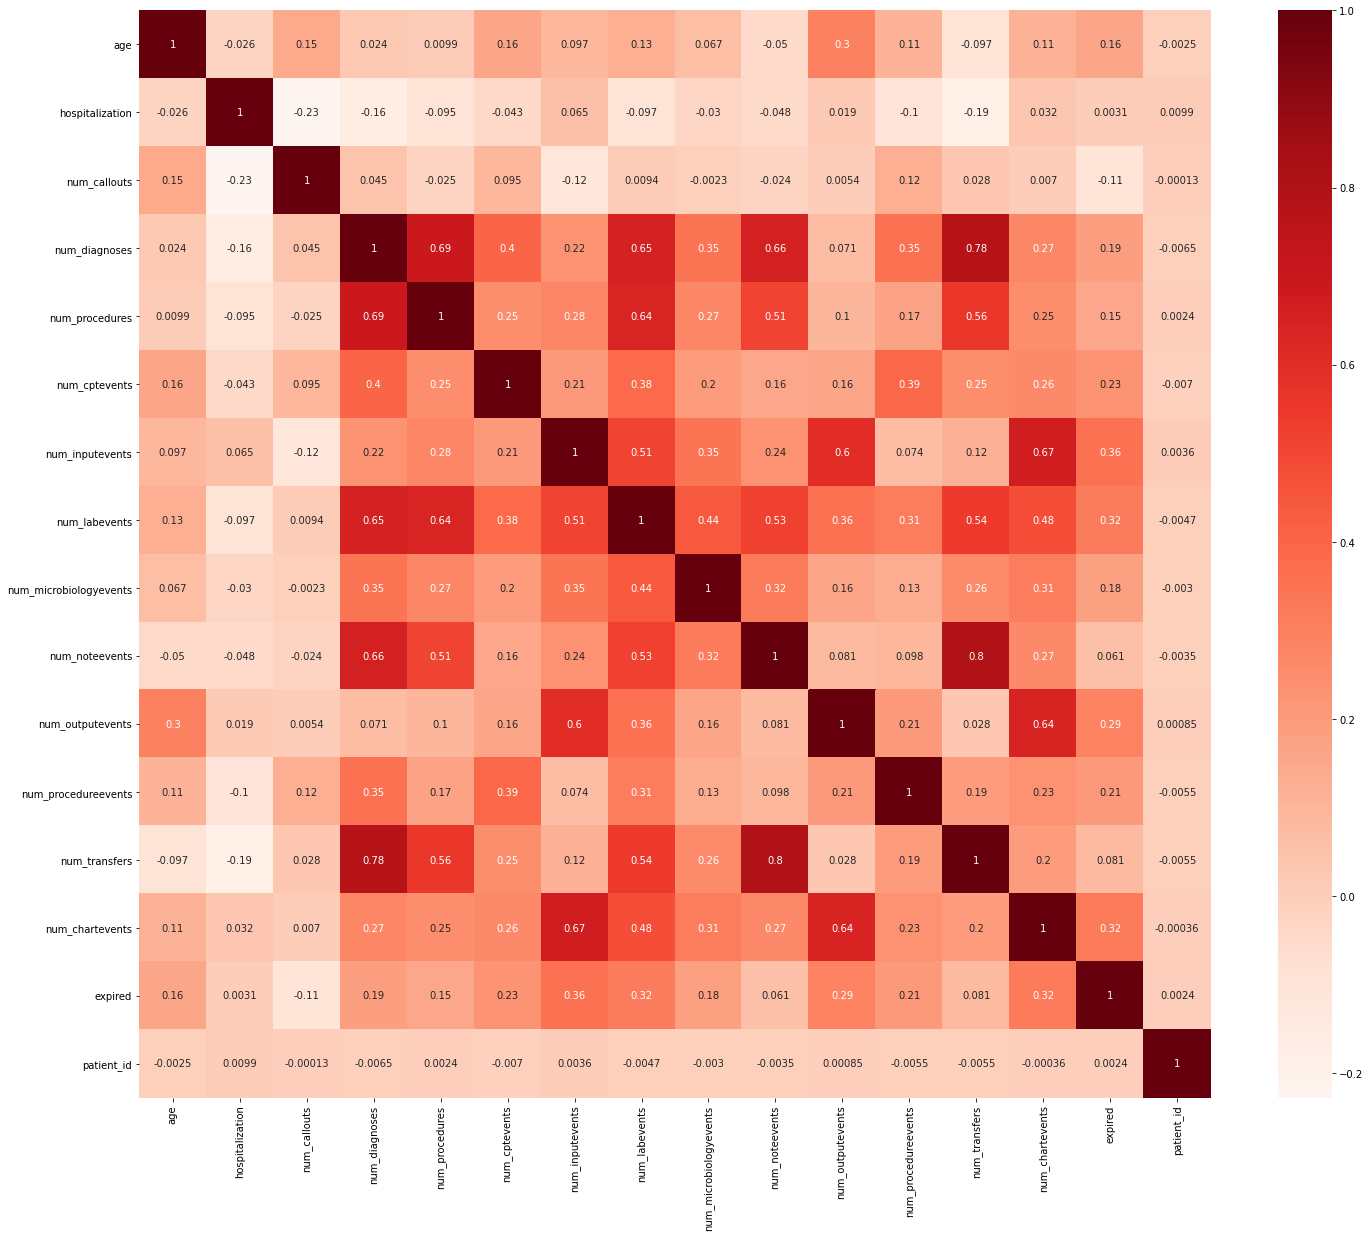

relevant features: hospitalization    1.000000
num_callouts       0.227613
num_diagnoses      0.160244
num_transfers      0.188162
Name: hospitalization, dtype: float64
irrelevant features: age                       0.025979
num_procedures            0.094991
num_cptevents             0.043462
num_inputevents           0.064526
num_labevents             0.097073
num_microbiologyevents    0.029504
num_noteevents            0.047842
num_outputevents          0.018864
num_procedureevents       0.099518
num_chartevents           0.031601
expired                   0.003083
patient_id                0.009936
Name: hospitalization, dtype: float64


In [21]:
#Using Pearson Correlation
plt.figure(figsize=(24,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with target variable
cor_target = abs(cor["hospitalization"])
#Selecting highly correlated features
relevant_features = cor_target[abs(cor_target>=0.1)]
irrelevant_f = cor_target[abs(cor_target<0.1)]
print('relevant features:',relevant_features)
print('irrelevant features:',irrelevant_f)

hospitalization vs number of callouts

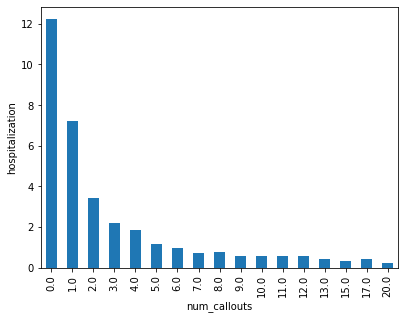

In [22]:
data.groupby("num_callouts")['hospitalization'].mean().plot(kind='bar')
plt.ylabel("hospitalization", fontsize = 10)
plt.xlabel("num_callouts", fontsize = 10)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10)
plt.rcParams["figure.figsize"] = (6.4,4.8)
plt.show()

number of diagnoses vs hospitalization

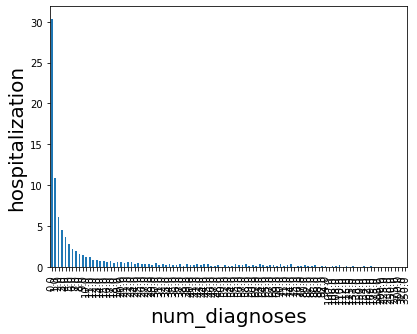

In [23]:
data.groupby("num_diagnoses")['hospitalization'].mean().plot(kind='bar')
plt.ylabel("hospitalization", fontsize = 20)
plt.xlabel("num_diagnoses", fontsize = 20)
plt.xticks(fontsize = 10,rotation = 90)
plt.yticks(fontsize = 10)
plt.rcParams["figure.figsize"] = (24,20)
plt.show()

number of transfers vs hospitalization

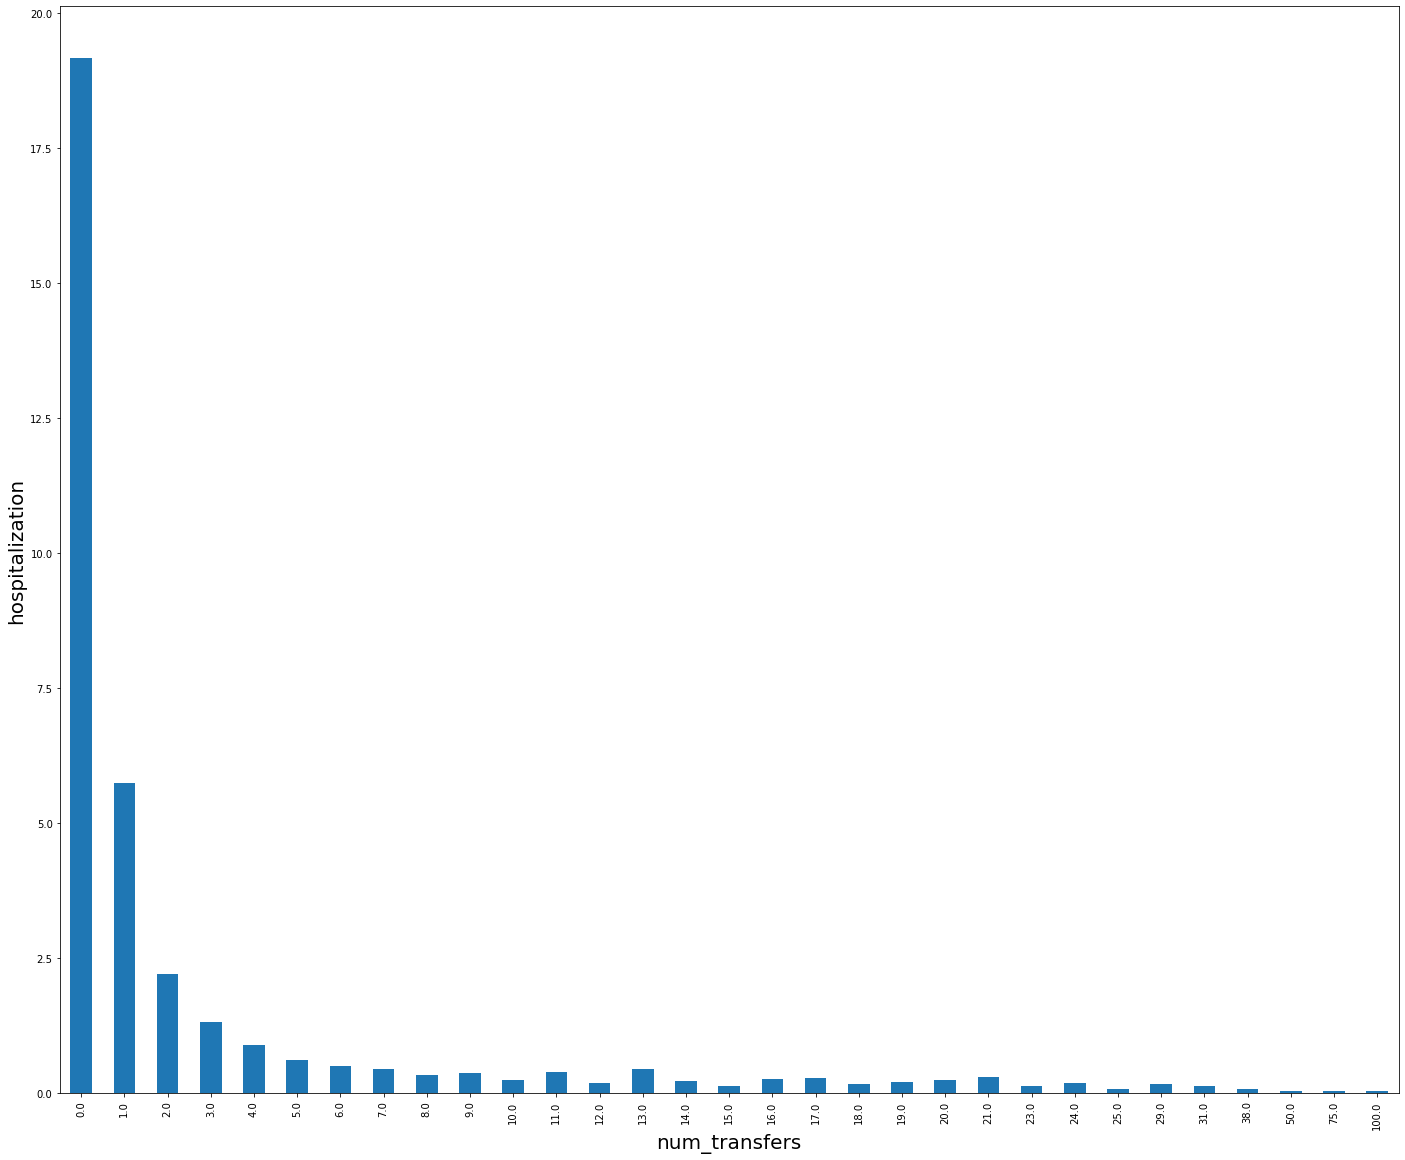

In [24]:
data.groupby("num_transfers")['hospitalization'].mean().plot(kind='bar')
plt.ylabel("hospitalization", fontsize = 20)
plt.xlabel("num_transfers", fontsize = 20)
plt.xticks(fontsize = 10,rotation = 90)
plt.yticks(fontsize = 10)
plt.rcParams["figure.figsize"] = (24,20)
plt.show()

gender vs hospitalization

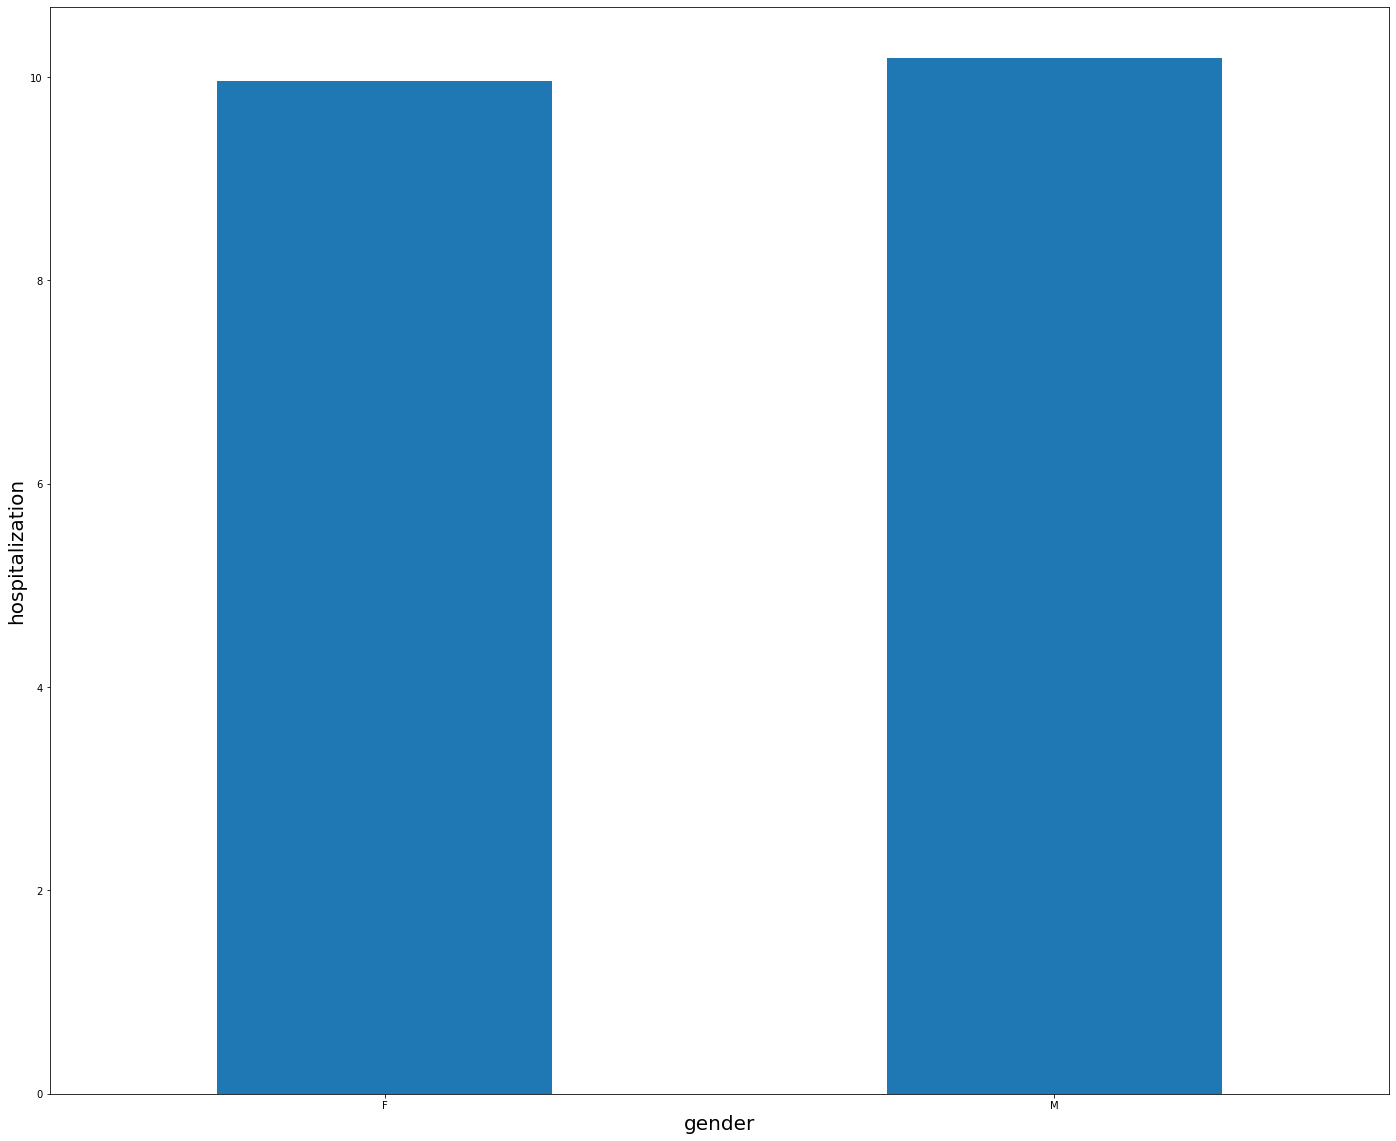

In [25]:
data.groupby("gender")['hospitalization'].mean().plot(kind='bar')
plt.ylabel("hospitalization", fontsize = 20)
plt.xlabel("gender", fontsize = 20)
plt.xticks(fontsize = 10, rotation = 0)
plt.yticks(fontsize = 10)
plt.rcParams["figure.figsize"] = (6.4,4.8)
plt.show()

HANDLE OUTLIERS


In [26]:
data['num_cptevents'].describe()

count    48976.000000
mean         1.046329
std          2.002183
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max        225.000000
Name: num_cptevents, dtype: float64

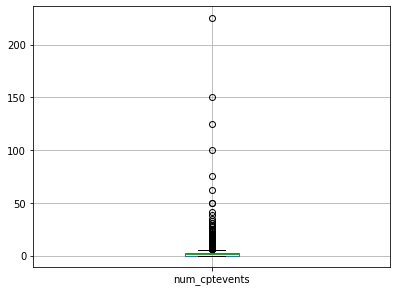

In [27]:
data.boxplot(column = 'num_cptevents' )

In [28]:
for i in data.columns:
  if i.startswith('num'):
    condition = data[i].mean() + 3 * data[i].std() 
    print(condition)
    data[i].where(data[i] < condition, data[i].mean(),inplace = True)#replace the values above mean+3sd with the mean value of the column
    data[i].value_counts()


3.055015969548562
27.242281443190915
11.742646395592065
7.052877765635812
219.26823786611618
275.06089495442734
14.610914907347231
312.56963528840805
29.465209840682054
7.124871491172678
10.550424011629481
2487.107861819614


In [29]:
for col in data.columns:
    print(col)
    print(data[col].value_counts(),'\n')

gender
M    27353
F    21623
Name: gender, dtype: int64 

age_group
Adult      23606
Elderly    18487
Baby        6796
Child         87
Name: age_group, dtype: int64 

age
0     6796
52    1358
58    1050
50     985
55     960
      ... 
17      59
16      20
15       7
14       1
89       1
Name: age, Length: 77, dtype: int64 

duration_of_hospitalization
Week        24569
TwoWeeks    12946
Month        6958
More         2512
Day          1881
Name: duration_of_hospitalization, dtype: int64 

hospitalization
1.96      311
4.00      304
2.00      284
4.04      281
3.96      280
         ... 
63.96       1
76.96       1
108.54      1
105.54      1
41.33       1
Name: hospitalization, Length: 1796, dtype: int64 

admission_type
EMERGENCY    34894
NEWBORN       6586
ELECTIVE      6379
URGENT        1117
Name: admission_type, dtype: int64 

admission_origin
EMERGENCY ROOM ADMISSION              10729
PHYSICAL REFERRAL                      9617
CLINIC REFERRAL                        6805
TR

ADMISSION DIAGNOSIS

In [30]:
diag = {}
for item in data['admission_diagnosis']:
  if item not in diag:
    diag[item] = 1
  else:
    diag[item] += 1 

print(diag)     

{'PNEUMONIA': 1307, 'SEIZURE': 256, 'SCALP LACERATION;RESPIRATORY FAILURE': 1, 'CARDIAC DZ.': 2, 'ABDOMINAL LAXITY/SDA': 1, 'RESPIRATORY FAILURE': 211, 'ABDOMINAL PAIN': 440, 'HEART BLOCK': 20, 'LT HIP FRACTURE': 2, 'SUBDURAL HEMORRHAGE': 76, 'SUBDURAL HEMATOMA': 221, 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT/SDA': 371, 'S/P CARDIAC ARREST': 54, 'DIABETIC KETOACIDOSIS': 382, 'RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY': 42, 'FEVER': 421, 'ACUTE MYOCARDIAL INFARCTION\\CATH': 71, 'NEWBORN': 6554, 'CHEST PAIN;TELEMETRY': 86, 'LOWER GI BLEED': 366, 'BRADYCARDIA': 84, 'EPISTAXIS': 9, 'TRIGEMINAL NEURALGIA/SDA': 5, 'HYDRONEPHROSIS\\ROUTINE PERCUTANEOUS NEPHROSTOMY TUBE CHANGE; PERFORM RENAL BIOPSY RIGHT KIDNEY **REMOTE WEST** ': 1, 'CHEST PAIN\\CATH': 138, 'TRACHEALBRONCHOMALACIA': 1, 'PNEUMONIA;DIABETIC KETOACIDOSIS': 4, 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT REDO /SDA': 6, 'CAD, MR\\CORONARY ARTERY BYPASS GRAFT;MITRAL VALVE REPLACEMENT/SDA': 1, 'MITRAL REGURGITAT

In [31]:
# def stemmer(s):
#   s = s.strip()
#   # s = s.replace("/" , ";")
#   # s = s.replace("//" , ";")
#   s = s.replace("\\" , "/")
#   s = s.replace("," , ";")
#   s = s.replace("?" , "")
#   s = s.replace("+" , "")
#   s = s.replace("-" , "")
#   s = s.replace("_" , "")
#   s = s.replace("." , "")
#   s = s.replace("!" , "")
#   return s

# str1 = '?ACUTE MI\CATH.'
# print(stemmer(str1))


In [32]:
# for item in data['admission_diagnosis']:
#   if type(item) == str:
#     data.replace(item,stemmer(item),inplace = True)


# data.head(50)

In [33]:
# # Adding two new columns to the existing dataframe. 
# # splitting is done on the basis of underscore. 
# df[['First','Last']] = df.Name.str.split("_",expand=True) 

In [34]:
data.head(50)

,gender,age_group,age,duration_of_hospitalization,hospitalization,admission_type,admission_origin,admission_diagnosis,insurance,religion,marital_status,ethnicity,num_callouts,num_diagnoses,num_procedures,admission_procedure,num_cptevents,num_inputevents,num_labevents,num_microbiologyevents,num_noteevents,num_outputevents,num_procedureevents,num_transfers,num_chartevents,expired,patient_id
0,M,Elderly,66,Week,5.92,EMERGENCY,CLINIC REFERRAL,PNEUMONIA,Medicare,NOT SPECIFIED,DIVORCED,WHITE,1.0,2.0,0.0,Closed bronchial biopsy,1.0,7.0,37.0,3.0,0.0,2.0,0.0,1.0,356.0,0,0
1,M,Adult,26,Week,3.79,EMERGENCY,EMERGENCY ROOM ADMISSION,SEIZURE,Government,NOT SPECIFIED,SINGLE,PATIENT DECLINED TO ANSWER,1.0,0.0,1.0,Cont inv mec ven <96 hrs,2.0,51.0,44.0,2.0,1.0,11.0,0.0,1.0,763.0,0,1
2,M,Adult,51,Month,18.00,EMERGENCY,ER ADMISSION,SCALP LACERATION;RESPIRATORY FAILURE,Government,UNOBTAINABLE,DIVORCED,BLACK/AFRICAN AMERICAN,0.0,1.0,1.0,Cont inv mec ven 96+ hrs,1.0,63.0,48.0,3.0,0.0,16.0,0.0,0.0,1102.0,0,2
3,F,Adult,51,TwoWeeks,13.79,URGENT,TRANSFER FROM HOSPITAL,CARDIAC DZ.,Private,OTHER,MARRIED,UNKNOWN/NOT SPECIFIED,0.0,1.0,0.0,Implt/repl carddefib tot,1.0,3.0,22.0,1.0,0.0,1.0,0.0,0.0,38.0,0,3
4,F,Elderly,72,TwoWeeks,9.21,ELECTIVE,NaN,ABDOMINAL LAXITY/SDA,Medicare,NOT SPECIFIED,SINGLE,WHITE,1.0,2.0,1.0,Uterine les destruct NEC,1.0,2.0,18.0,0.0,0.0,3.0,0.0,0.0,155.0,0,4
5,F,Adult,62,TwoWeeks,8.00,EMERGENCY,TRANSFER FROM HOSP.,RESPIRATORY FAILURE,Private,NOT SPECIFIED,MARRIED,WHITE,1.0,3.0,0.0,Cont inv mec ven <96 hrs,2.0,4.0,32.0,0.0,0.0,3.0,0.0,0.0,276.0,0,5
6,F,Adult,48,Week,2.92,EMERGENCY,CLINIC REFERRAL,ABDOMINAL PAIN,Medicare,PROTESTANT QUAKER,SINGLE,BLACK/AFRICAN AMERICAN,0.0,6.0,0.0,Venous cath NEC,1.0,9.0,73.0,10.0,0.0,3.0,2.0,1.0,361.0,0,6
7,F,Adult,61,Week,2.13,EMERGENCY,CLINIC REFERRAL,HEART BLOCK,Government,PROTESTANT QUAKER,WIDOWED,BLACK/AFRICAN AMERICAN,0.0,6.0,1.0,Int insert dual-cham dev,0.0,2.0,42.0,0.0,1.0,3.0,3.0,1.0,477.0,0,7
8,F,Elderly,81,TwoWeeks,7.38,EMERGENCY,EMERGENCY ROOM ADMISSION,LT HIP FRACTURE,Medicare,JEWISH,MARRIED,GUERO,0.0,1.0,0.0,Partial hip replacement,1.0,14.0,44.0,0.0,0.0,10.0,0.0,1.0,542.0,0,8
9,F,Elderly,76,TwoWeeks,13.75,EMERGENCY,EMERGENCY ROOM ADMISSION,SUBDURAL HEMORRHAGE,Medicare,CATHOLIC,WIDOWED,WHITE,0.0,1.0,0.0,Incise cerebral meninges,0.0,8.0,37.0,3.0,0.0,6.0,0.0,0.0,421.0,0,9


ETHNICITY

In [35]:
#unknown
data['ethnicity'] = data['ethnicity'].replace(['?','N/A','NOT SPECIFIED','UNABLE TO OBTAIN','UNK','UNKNOWN','UNKNOWN/NOT SPECIFIED','PATIENT DECLINED TO ANSWER'],'UNKNOWN')
#asian
data['ethnicity'] = data['ethnicity'].replace(['ASIAN - ASIAN INDIAN','ASIAN - CAMBODIAN','ASIAN - CHINESE','ASIAN - FILIPINO','ASIAN - JAPANESE','ASIAN - KOREAN','ASIAN - OTHER','ASIAN - THAI','ASIAN - VIETNAMESE'],'ASIAN')
#white
data['ethnicity'] = data['ethnicity'].replace(['CAUCASIAN','CAUCATIAN','WHITE - BRAZILIAN','PORTUGUESE','WHITE - EASTERN EUROPEAN','WHITE - OTHER EUROPEAN','WHITE - RUSSIAN'],'WHITE')
#latinos
data['ethnicity'] = data['ethnicity'].replace(['GUERO','HISPANIC OR LATINO','HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)','HISPANIC/LATINO - COLOMBIAN','HISPANIC/LATINO - CUBAN','HISPANIC/LATINO - DOMINICAN','HISPANIC/LATINO - GUATEMALAN','HISPANIC/LATINO - HONDURAN','HISPANIC/LATINO - MEXICAN','HISPANIC/LATINO - PUERTO RICAN','HISPANIC/LATINO - SALVADORAN'],'HISPANIC/LATINO')
#black
data['ethnicity'] = data['ethnicity'].replace(['BLACK/AFRICAN AMERICAN','BLACK/HAITIAN','BLACK/AFRICAN','BLACK/CAPE VERDEAN','CARIBBEAN ISLAND'],'BLACK')




In [36]:
#all other ethnicities go to "other"
for item in data['ethnicity']:
  if item not in ['UNKNOWN','WHITE','BLACK','ASIAN','HISPANIC/LATINO']:
    data['ethnicity'] = data['ethnicity'].replace(item,'OTHER')

data.head(50)

,gender,age_group,age,duration_of_hospitalization,hospitalization,admission_type,admission_origin,admission_diagnosis,insurance,religion,marital_status,ethnicity,num_callouts,num_diagnoses,num_procedures,admission_procedure,num_cptevents,num_inputevents,num_labevents,num_microbiologyevents,num_noteevents,num_outputevents,num_procedureevents,num_transfers,num_chartevents,expired,patient_id
0,M,Elderly,66,Week,5.92,EMERGENCY,CLINIC REFERRAL,PNEUMONIA,Medicare,NOT SPECIFIED,DIVORCED,WHITE,1.0,2.0,0.0,Closed bronchial biopsy,1.0,7.0,37.0,3.0,0.0,2.0,0.0,1.0,356.0,0,0
1,M,Adult,26,Week,3.79,EMERGENCY,EMERGENCY ROOM ADMISSION,SEIZURE,Government,NOT SPECIFIED,SINGLE,UNKNOWN,1.0,0.0,1.0,Cont inv mec ven <96 hrs,2.0,51.0,44.0,2.0,1.0,11.0,0.0,1.0,763.0,0,1
2,M,Adult,51,Month,18.00,EMERGENCY,ER ADMISSION,SCALP LACERATION;RESPIRATORY FAILURE,Government,UNOBTAINABLE,DIVORCED,BLACK,0.0,1.0,1.0,Cont inv mec ven 96+ hrs,1.0,63.0,48.0,3.0,0.0,16.0,0.0,0.0,1102.0,0,2
3,F,Adult,51,TwoWeeks,13.79,URGENT,TRANSFER FROM HOSPITAL,CARDIAC DZ.,Private,OTHER,MARRIED,UNKNOWN,0.0,1.0,0.0,Implt/repl carddefib tot,1.0,3.0,22.0,1.0,0.0,1.0,0.0,0.0,38.0,0,3
4,F,Elderly,72,TwoWeeks,9.21,ELECTIVE,NaN,ABDOMINAL LAXITY/SDA,Medicare,NOT SPECIFIED,SINGLE,WHITE,1.0,2.0,1.0,Uterine les destruct NEC,1.0,2.0,18.0,0.0,0.0,3.0,0.0,0.0,155.0,0,4
5,F,Adult,62,TwoWeeks,8.00,EMERGENCY,TRANSFER FROM HOSP.,RESPIRATORY FAILURE,Private,NOT SPECIFIED,MARRIED,WHITE,1.0,3.0,0.0,Cont inv mec ven <96 hrs,2.0,4.0,32.0,0.0,0.0,3.0,0.0,0.0,276.0,0,5
6,F,Adult,48,Week,2.92,EMERGENCY,CLINIC REFERRAL,ABDOMINAL PAIN,Medicare,PROTESTANT QUAKER,SINGLE,BLACK,0.0,6.0,0.0,Venous cath NEC,1.0,9.0,73.0,10.0,0.0,3.0,2.0,1.0,361.0,0,6
7,F,Adult,61,Week,2.13,EMERGENCY,CLINIC REFERRAL,HEART BLOCK,Government,PROTESTANT QUAKER,WIDOWED,BLACK,0.0,6.0,1.0,Int insert dual-cham dev,0.0,2.0,42.0,0.0,1.0,3.0,3.0,1.0,477.0,0,7
8,F,Elderly,81,TwoWeeks,7.38,EMERGENCY,EMERGENCY ROOM ADMISSION,LT HIP FRACTURE,Medicare,JEWISH,MARRIED,HISPANIC/LATINO,0.0,1.0,0.0,Partial hip replacement,1.0,14.0,44.0,0.0,0.0,10.0,0.0,1.0,542.0,0,8
9,F,Elderly,76,TwoWeeks,13.75,EMERGENCY,EMERGENCY ROOM ADMISSION,SUBDURAL HEMORRHAGE,Medicare,CATHOLIC,WIDOWED,WHITE,0.0,1.0,0.0,Incise cerebral meninges,0.0,8.0,37.0,3.0,0.0,6.0,0.0,0.0,421.0,0,9


In [37]:
data['ethnicity'].isna().sum()

0

ADMISSION ORIGIN

In [ ]:
for item in data['admission_origin']:
  if type(item) == str:
    data.replace(item,item.strip(),inplace = True)

data['admission_origin'].value_counts()

In [ ]:
#emergency room
data['admission_origin'] = data['admission_origin'].replace(['ER ADMIT','ER ADMISSION','EMERGENCY ROOM ADMISSION','ADMITTED FROM EMERGENCY','ADMITTED FRIM EMERGENCY','EMERGENCY ROOM ADMISSION'],'EMERGENCY ROOM')
#unspecified
data['admission_origin'] = data['admission_origin'].replace(['?','N/A','NOT AVAILABLE','NA','NOT AVAIL.'],'UNKNOWN')
#clinic
data['admission_origin'] = data['admission_origin'].replace(['CLINIC REFERRAL','CINIC REFERRAL','CLINIC','CLINIC REFERAL','FROM CLINIC'],'CLINIC')
#transfer from hospital
data['admission_origin'] = data['admission_origin'].replace(['HOSP. TRAN.','HOSPITAL TRANSFER','TFH','TRANFSER FROM HOSPITAL','TRANFSER FROM SAME HOSP.','TRANS FRM HPL','TRANSFER FROM HOSP.','TRANSFER FROM HOSPITAL','TRANSFER FROM SAME HOSPITAL'],'HOSPITAL')
#HMO REFERRAL
data['admission_origin'] = data['admission_origin'].replace(['HMO REFERAL','HMO REFERRAL'],'HMO')
# PHYSICAL REFERRAL
data['admission_origin'] = data['admission_origin'].replace(['PHYSICAL REFERRAL','PHYS REFERRAL'],'PHYSICAL')
#NURSE
data['admission_origin'] = data['admission_origin'].replace(['TRANS FRM SKL NURSE','TRANSFER FROM SKILLED NURSE'],'NURSE')
#FROM OTHER 
data['admission_origin'] = data['admission_origin'].replace(['TRANSFER FROM OTHER HEALTH CENTER','TRNS FR HEALTH CNTR'],'HEALTH CENTER')
# FILL NAN VALUES
data['admission_origin'].fillna('UNKNOWN',inplace = True)

In [ ]:
data.head(50)

INSURANCE

In [ ]:
data['insurance'].fillna('UNKNOWN',inplace = True)
for item in data['insurance']:
  data.replace(item,item.upper(),inplace = True)

data['insurance'] = data['insurance'].replace(['?','N/A'],'UNKNOWN')

In [ ]:
data['insurance'].isna().sum() #check for any missing values 

ADMISSION TYPE (ONLY MISSING VALUES)

In [ ]:
data['admission_type'].fillna('UNKNOWN',inplace = True)


MARITAL STATUS

In [ ]:
data['marital_status'].fillna('UNKNOWN',inplace = True)
for item in data['marital_status']:
  if type(item) == str:
    data.replace(item,item.strip(),inplace = True)
data['marital_status'] = data['marital_status'].replace(['?','N/A','nan','UNKNOWN(DEFAULT)'],'UNKNOWN')

data.head()


In [ ]:
data['marital_status'].isna().sum() #check for any missing values 

ADMISSION PROCEDURE

In [ ]:
data['admission_procedure'].fillna('UNKNOWN',inplace = True) #fill nan values with "UNKNOWN"
data['admission_procedure'] = data['admission_procedure'].replace(['na','N/A','nan'],'UNKNOWN')
for item in data['admission_procedure']:
  data.replace(item,item.upper(),inplace = True) #uppercase

In [ ]:
data['admission_procedure'].isna().sum() #check for any missing values

In [ ]:
data.head()

***NLP*** FOR ADMISSION PROCEDURE

In [ ]:
pip install sparse-dot-topn

In [ ]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sparse_dot_topn import awesome_cossim_topn

# Import your data to a Pandas.DataFrame
# df = pd.read_csv('./dol-data.csv')

# Instaniate our lookup hash table
group_lookup = {}


# Write a function for cleaning strings and returning an array of ngrams
def ngrams_analyzer(string):
    string = re.sub(r'[,-./]', r'', string)
    ngrams = zip(*[string[i:] for i in range(4)])  # N-Gram length is 5
    return [''.join(ngram) for ngram in ngrams]


def find_group(row, col):
    # If either the row or the col string have already been given
    # a group, return that group. Otherwise return none
    if row in group_lookup:
        return group_lookup[row]
    elif col in group_lookup:
        return group_lookup[col]
    else:
        return None


def add_vals_to_lookup(group, row, col):
    # Once we know the group name, set it as the value
    # for both strings in the group_lookup
    group_lookup[row] = group
    group_lookup[col] = group


def add_pair_to_lookup(row, col):
    # in this function we'll add both the row and the col to the lookup
    group = find_group(row, col)  # first, see if one has already been added
    if group is not None:
        # if we already know the group, make sure both row and col are in lookup
        add_vals_to_lookup(group, row, col)
    else:
        # if we get here, we need to add a new group.
        # The name is arbitrary, so just make it the row
        add_vals_to_lookup(row, row, col)


# Construct your vectorizer for building the TF-IDF matrix
vectorizer = TfidfVectorizer(analyzer=ngrams_analyzer)

# Grab the column you'd like to group, filter out duplicate values
# and make sure the values are Unicode
vals = data['admission_procedure'].unique().astype('U')

# Build the matrix!!!
tfidf_matrix = vectorizer.fit_transform(vals)

cosine_matrix = awesome_cossim_topn(tfidf_matrix, tfidf_matrix.transpose(), vals.size, 0.6)

# Build a coordinate matrix
coo_matrix = cosine_matrix.tocoo()

# for each row and column in coo_matrix
# if they're not the same string add them to the group lookup
for row, col in zip(coo_matrix.row, coo_matrix.col):
    if row != col:
        add_pair_to_lookup(vals[row], vals[col])

data['Group'] = data['admission_procedure'].map(group_lookup).fillna(data['admission_procedure'])

In [ ]:
data.head()

In [ ]:
data['Group'].value_counts()

In [ ]:
data['Group'].isna().sum()

In [ ]:
data['admission_procedure'].head(50)

In [ ]:
df_group = pd.DataFrame(data['Group'])
df_group.head(50)

In [ ]:
data['admission_procedure'].value_counts().plot.hist(bins = 100)